In [1]:
import torch
from collections import defaultdict
import sys
import os
from PIL import Image
import json, cv2, math
import numpy as np
import argparse
from tqdm import tqdm
import cv2, base64

/root/anaconda3/envs/disco_jsh/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [59]:
import numpy as np
a=np.array([[[1,2],[3,4]],
            [[5,6],[7,8]],
            [[9,10],[11,12]]])
b=np.array([[[1,1],[1,1]],
            [[5,6],[7,8]],
            [[9,10],[11,12]]])
# print(a[:,].shape)
c = np.empty_like(a[0], dtype=list)
for i in range(2):
    for j in range(2):
        # item=np.where(a[:]==b[:,i,j])
        item=np.where((a[0]==b[0,i,j])&(a[1]==b[1,i,j])&(a[2]==b[2,i,j]))
        # print(item)
        if item!=None:
            coordinates = list(zip(item[0], item[1]))
            c[i,j]=coordinates
print(c)
print(c[0,1])

[[list([(0, 0)]) list([])]
 [list([]) list([])]]
[]


In [2]:
def tsv_reader(tsv_file, sep='\t'):
    with open(tsv_file, 'r') as fp:
        for i, line in enumerate(fp):
            yield [x.strip() for x in line.split(sep)]

In [10]:
dataset_root = '.'
tsv_fname_img = dataset_root + '/toy_dataset/tsv/train_images.tsv'
tsv_fname_msk = dataset_root + '/toy_dataset/tsv/train_masks.tsv'
tsv_fname_pose = dataset_root + '/toy_dataset/tsv/train_poses.tsv'
tsv_fname_img = '/HOME/HOME/jisihui/VITON-hd-resized/train/tsv/train_img.tsv'
tsv_fname_msk = '/HOME/HOME/jisihui/VITON-hd-resized/train/tsv/train_img_mask.tsv'
tsv_fname_pose = '/HOME/HOME/jisihui/VITON-hd-resized/train/tsv/train_cloth.tsv'
tsv_fname_smpl = '/HOME/HOME/jisihui/VITON-hd-resized/train/tsv/train_smpl.tsv'
tsv_fname_cloth_msk = '/HOME/HOME/jisihui/VITON-hd-resized/train/tsv/train_cloth_mask.tsv'
tsv_img = tsv_reader(tsv_fname_img)
tsv_msk = tsv_reader(tsv_fname_msk)
tsv_pose = tsv_reader(tsv_fname_pose)
tsv_smpl = tsv_reader(tsv_fname_smpl)
tsv_cloth_msk = tsv_reader(tsv_fname_cloth_msk)



In [18]:
item = next(tsv_img)
img_key = item[0]
image = cv2.imdecode(np.frombuffer(base64.b64decode(item[1]), np.uint8),cv2.IMREAD_COLOR)


item = next(tsv_msk)
msk_key = item[0]
mask = cv2.imdecode(np.frombuffer(base64.b64decode(item[1]), np.uint8),cv2.IMREAD_COLOR)

item = next(tsv_pose)
pose_key = item[0]
pose = cv2.imdecode(np.frombuffer(base64.b64decode(item[1]), np.uint8),cv2.IMREAD_COLOR)

item = next(tsv_smpl)
smpl_key = item[0]
smpl = cv2.imdecode(np.frombuffer(base64.b64decode(item[1]), np.uint8),cv2.IMREAD_COLOR)

item = next(tsv_cloth_msk)
cloth_msk_key = item[0]
cloth_msk = cv2.imdecode(np.frombuffer(base64.b64decode(item[1]), np.uint8),cv2.IMREAD_COLOR)

In [6]:
print('image shape:', image.shape)
print('mask shape:', mask.shape)
print('pose shape:', pose.shape)
print('smpl shape:', smpl.shape)

image shape: (1024, 768, 3)
mask shape: (1024, 768, 3)
pose shape: (1024, 768, 3)
smpl shape: (1024, 768, 3)


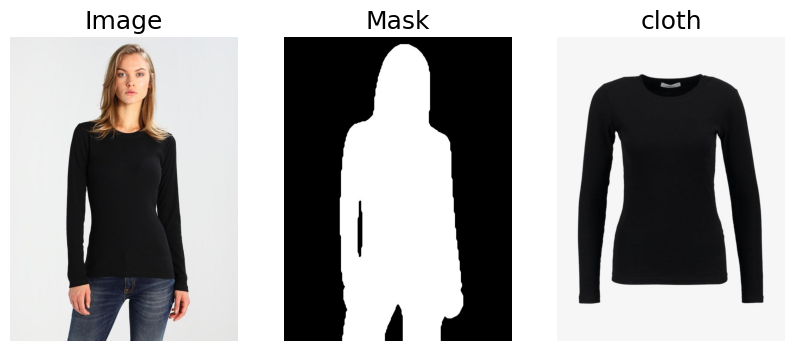

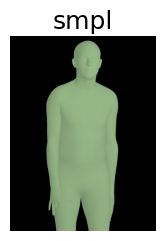

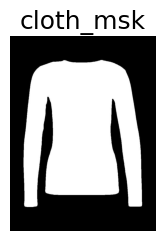

In [19]:
# display
from PIL import Image
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

plt.subplot(1,3,1)
plt.axis('off')
plt.title('Image',fontsize=18)
plt.imshow(image[:,:,::-1])

plt.subplot(1,3,2)
plt.axis('off')
plt.title('Mask',fontsize=18)
plt.imshow(mask[:,:,::-1])

plt.subplot(1,3,3)
plt.axis('off')
plt.title('cloth',fontsize=18)
plt.imshow(pose[:,:,::-1])


plt.subplot(1,3,1)
plt.axis('off')
plt.title('smpl',fontsize=18)
plt.imshow(smpl[:,:,::-1])


plt.subplot(1,3,2)
plt.axis('off')
plt.title('cloth_msk',fontsize=18)
plt.imshow(cloth_msk[:,:,::-1])
plt.show()

(1024, 768)


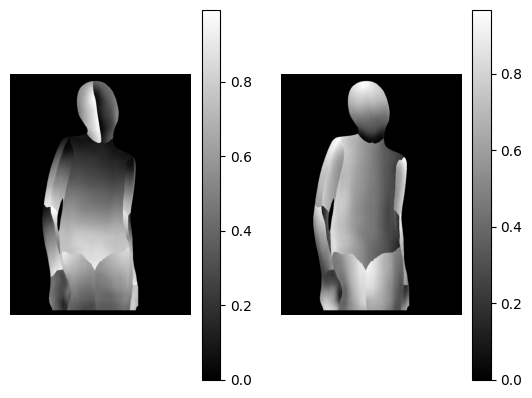

In [9]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
tensor_transforms = transforms.Compose(
    [
        transforms.Normalize([0.5], [0.5]),
    ]
)
imSize = (512, 640)
h, w = imSize[1], imSize[0]
# dp_path = '/home/nfs/jsh/DreamPose/demo/sample/poses/demo/sample/poses/frame_50_densepose.npy'
dp_path = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00006_00.jpg.npy'
# from IPython import embed; embed()
data0 = np.load(dp_path)[0]
data1 = np.load(dp_path)[1]
print(data0.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data0, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data1,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()



(2, 1024, 768)
(2, 1024, 768)
(2, 1024, 768)
(1024, 768)


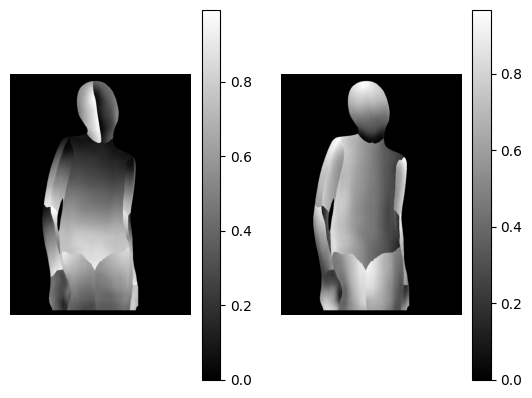

(1024, 768)


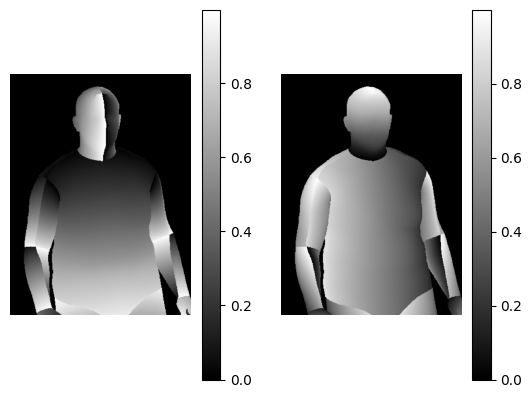

(1024, 768)


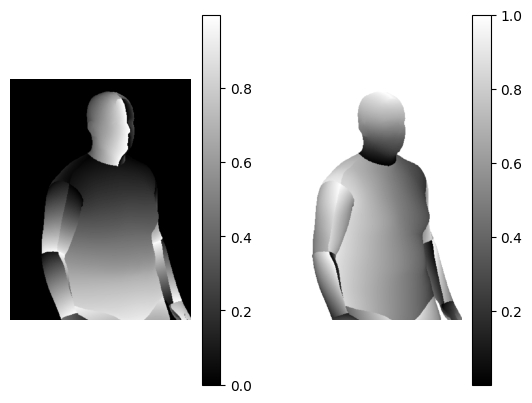

(1024, 768)


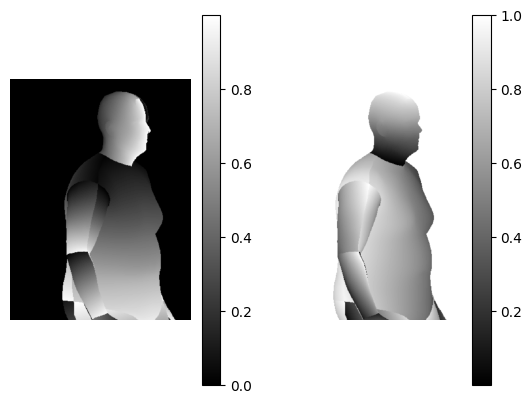

In [4]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
tensor_transforms = transforms.Compose(
    [
        transforms.Normalize([0.5], [0.5]),
    ]
)
imSize = (512, 640)
h, w = imSize[1], imSize[0]
dp_path = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00006_00.jpg.npy'
dp_path0 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my/iuv1.npy'
dp_path2 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my/iuv1_45.npy'
dp_path1 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my/iuv1_22_5.npy'
# from IPython import embed; embed()
data00 = np.load(dp_path)[0, :, :]
data01 = np.load(dp_path)[1, :, :]

data1 = np.load(dp_path0)
data1[1][data1[1] != 0] = 1 - data1[1][data1[1] != 0]
print(data1.shape)
np.save(dp_path0, data1)
data10 = np.load(dp_path0)[ 0, :, :]
data11 = np.load(dp_path0)[ 1, :, :]

data2 = np.load(dp_path1)[0, :, :]
data3 = 1-np.load(dp_path1)[1, :, :]
data10 = np.load(dp_path0)[ 0, :, :]
data11 = np.load(dp_path0)[ 1, :, :]
data11[data11 != 0] = 1 - data11[data11 != 0]
data1=np.array([data10,data11])
print(data1.shape)

data4 = np.load(dp_path2)[0, :, :]
data5 = 1-np.load(dp_path2)[1, :, :]
data10 = np.load(dp_path0)[ 0, :, :]
data11 = np.load(dp_path0)[ 1, :, :]
data11[data11 != 0] = 1 - data11[data11 != 0]
data1=np.array([data10,data11])
print(data1.shape)

print(data00.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data00, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data01,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

print(data10.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data10, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data11,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

print(data2.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data2, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data3,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

print(data4.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data4, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data5,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

(1024, 768)


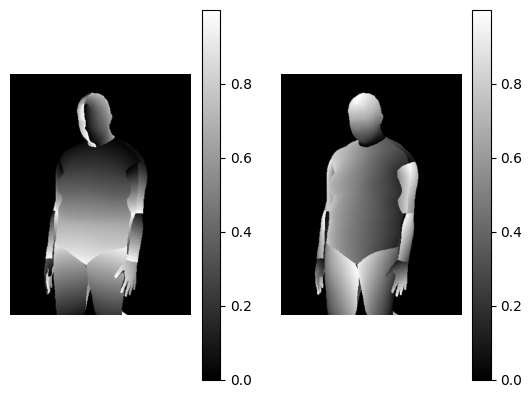

(1024, 768)


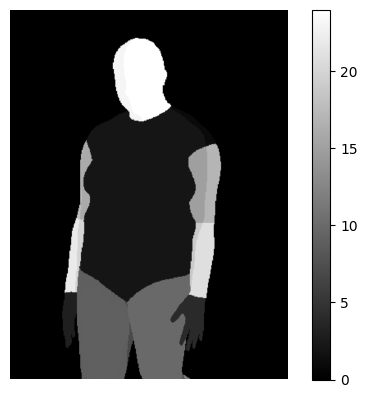

In [87]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
tensor_transforms = transforms.Compose(
    [
        transforms.Normalize([0.5], [0.5]),
    ]
)
imSize = (512, 640)
h, w = imSize[1], imSize[0]
dp_path = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_0.npy'

dp_path0 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/i_0.npy'

dp_path2 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_0.npy'

dp_path1 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_0.npy'

# from IPython import embed; embed()
data00 = np.load(dp_path)[0, :, :]
data01 = np.load(dp_path)[1, :, :]
# data1 = np.load(dp_path0)
data10 = np.load(dp_path0)[ 0, :, :]
# data11 = np.load(dp_path0)[ 1, :, :]
# data11[data11 != 0] = 1 - data11[data11 != 0]
# data1=np.array([data10,data11])
# print(data1.shape)
# np.save('/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my/iuv1.npy', data1)

# data2 = np.load(dp_path1)[0, :, :]
# data3 = 1-np.load(dp_path1)[1, :, :]
# data4 = np.load(dp_path2)[0, :, :]
# data5 = 1-np.load(dp_path2)[1, :, :]

print(data00.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data00, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data01,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

print(data10.shape)
plt.axis('off')
# 绘制图像
plt.imshow(data10, cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

# print(data2.shape)
# plt.subplot(1,2,1)
# plt.axis('off')
# # 绘制图像
# plt.imshow(data2, cmap='gray')
# # 添加颜色条
# plt.colorbar()

# plt.subplot(1,2,2)
# plt.axis('off')
# # 绘制图像
# plt.imshow(data3,cmap='gray')
# # 添加颜色条
# plt.colorbar()
# plt.show()

# print(data4.shape)
# plt.subplot(1,2,1)
# plt.axis('off')
# # 绘制图像
# plt.imshow(data4, cmap='gray')
# # 添加颜色条
# plt.colorbar()

# plt.subplot(1,2,2)
# plt.axis('off')
# # 绘制图像
# plt.imshow(data5,cmap='gray')
# # 添加颜色条
# plt.colorbar()
# plt.show()

In [76]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
tensor_transforms = transforms.Compose(
    [
        transforms.Normalize([0.5], [0.5]),
    ]
)
imSize = (512, 640)
h, w = imSize[1], imSize[0]
dp_path = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00006_00.jpg.npy'
dp_path0 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my2/range/iuv_0.npy'

# from IPython import embed; embed()
data00 = np.load(dp_path)[0, :, :]
data01 = np.load(dp_path)[1, :, :]


data1 = np.load(dp_path0)
print(data1[0,780, 173])
print(data1[0,780, 173].dtype)
print(data1[0,780, 173].round())
print(data1[0,780, 173].round().dtype)
# data1[1][data1[1] != 0] = 1 - data1[1][data1[1] != 0]
print(data1.shape)
# np.save(dp_path0, data1)
data10 = np.load(dp_path0)[ 0, :, :]
data11 = np.load(dp_path0)[ 1, :, :]

c = np.empty_like(data10, dtype=list)

for i in range(102):
    for j in range(76):
        item=np.where(data10==data00[i, j])
        c[i,j]=item


# 找出元素值为 0.5 的坐标
print(c)
# # indices = np.where(data10 == 0.9344242215)
# # coordinates = list(zip(indices[0], indices[1]))
# indices = np.argwhere(np.isclose(data10, 0.934424))
# coordinates = [tuple(idx) for idx in indices]
# print(coordinates)
# print('---')
# # indices = np.where(data00 == 0.9344242215)
# # coordinates = list(zip(indices[0], indices[1]))
# indices = np.argwhere(np.isclose(data00, 0.934424))
# coordinates = [tuple(idx) for idx in indices]
# print(coordinates)
# print('---')
# # for i in coordinates:
# #     print(data11[i])
# # indices = np.where(data11 == 0.608372)
# # coordinates = list(zip(indices[0], indices[1]))
# # print(coordinates)




0.9344242
float32
1.0
float32
(2, 1024, 768)
[[(array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  (array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  (array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  ... None None None]
 [(array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  (array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  (array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  ... None None None]
 [(array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  (array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  (array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  ... None None None]
 ...
 [None None

In [63]:
import numpy as np
a=np.array([[[1,2],[3,4]],
            [[5,6],[7,8]],
            [[9,10],[11,12]]])
b=np.array([[[1,1],[1,1]],
            [[5,6],[7,8]],
            [[9,10],[11,12]]])
# print(a[:,].shape)
c = np.empty_like(a[0], dtype=list)
for i in range(2):
    for j in range(2):
        # item=np.where(a[:]==b[:,i,j])
        item=np.where((a[0]==b[0,i,j])&(a[1]==b[1,i,j])&(a[2]==b[2,i,j]))
        print(item)
        if item!=None:
            # print(item)
            coordinates = list(zip(item[0], item[1]))
            c[i,j]=coordinates
print(c)
print(c[0,1])

[[None None]
 [None None]]
(array([0]), array([0]))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
[[list([(0, 0)]) list([])]
 [list([]) list([])]]
[]


In [79]:

from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
tensor_transforms = transforms.Compose(
    [
        transforms.Normalize([0.5], [0.5]),
    ]
)
imSize = (512, 640)
h, w = imSize[1], imSize[0]
dp_path0 = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00006_00.jpg.npy'
dp_path1 = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00008_00.jpg.npy'

# dp_path = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my2/range/iuv_0.npy'
dp_i_path0 = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose_i/00006_00.jpg.npy'
dp_i_path1 = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose_i/00008_00.jpg.npy'
# from IPython import embed; embed()


# data1 = np.load(dp_path1)
# print(data1[0,780, 173])
# print(data1[0,780, 173].dtype)
# print(data1[0,780, 173].round(decimals=3))
# print(data1[0,780, 173].round().dtype)
# data1[1][data1[1] != 0] = 1 - data1[1][data1[1] != 0]
# print(data1.shape)
# np.save(dp_path0, data1)

data10 = np.load(dp_path1)[ 0, :, :].round(decimals=3)
data11 = np.load(dp_path1)[ 1, :, :].round(decimals=3)
data1_uv = np.load(dp_path1).round(decimals=2)
data1_i = np.load(dp_i_path1)

data1 = np.concatenate([data1_uv,data1_i],axis=0)
print(data1.shape)
# 1 1024 

data00 = np.load(dp_path0)[0, :, :].round(decimals=3)
data01 = np.load(dp_path0)[1, :, :].round(decimals=3)
data0_uv = np.load(dp_path0).round(decimals=2)
data0_i = np.load(dp_i_path0)

data0 = np.concatenate([data0_uv,data0_i],axis=0)
print(data0.shape)

# import numpy as np
# a=np.array([[[1,2],[3,4]],
#             [[5,6],[7,8]],
#             [[9,10],[11,12]]])
# b=np.array([[[1,1],[1,1]],
#             [[5,6],[7,8]],
#             [[9,10],[11,12]]])
# print(a[2].shape)
c = np.empty_like(data0[0], dtype=list)
d = np.empty_like(data0[0], dtype=list)
# print(data0[1,30,355])
for i in range(30,35):
    for j in range(350,355):
        # item=np.where(data0[:]==data1[:,i,j])
        item=np.where((data0[0]==data1[0,i,j])&(data0[1]==data1[1,i,j])&(data0[2]==data1[2,i,j]))
        # print(item)
        if item!=None:
            coordinates = list(zip(item[0], item[1]))
            d[i,j]=coordinates
            c[i,j]=[np.mean(item[0]).round(),np.mean(item[1]).round()]
cnt = 0
for i in range(30,35):
    for j in range(350,355):
            print(c[i,j])
            print(d[i,j])
            cnt+=1
print(cnt)

(3, 1024, 768)
(3, 1024, 768)
[75.0, 386.0]
[(73, 385), (73, 386), (74, 386), (75, 386), (76, 387), (77, 387)]
[75.0, 386.0]
[(73, 385), (73, 386), (74, 386), (75, 386), (76, 387), (77, 387)]
[75.0, 387.0]
[(73, 387), (74, 387), (75, 387), (75, 388), (76, 388)]
[74.0, 388.0]
[(72, 388), (73, 388), (74, 388), (74, 389), (75, 389)]
[77.0, 390.0]
[(76, 389), (76, 390), (77, 390), (78, 390), (78, 391)]
[76.0, 386.0]
[(74, 385), (75, 385), (76, 386), (77, 386)]
[75.0, 386.0]
[(73, 385), (73, 386), (74, 386), (75, 386), (76, 387), (77, 387)]
[75.0, 387.0]
[(73, 387), (74, 387), (75, 387), (75, 388), (76, 388)]
[78.0, 389.0]
[(77, 388), (77, 389), (78, 389), (79, 389)]
[77.0, 390.0]
[(76, 389), (76, 390), (77, 390), (78, 390), (78, 391)]
[76.0, 386.0]
[(74, 385), (75, 385), (76, 386), (77, 386)]
[78.0, 388.0]
[(78, 388), (79, 388)]
[78.0, 388.0]
[(78, 388), (79, 388)]
[78.0, 389.0]
[(77, 388), (77, 389), (78, 389), (79, 389)]
[78.0, 389.0]
[(77, 388), (77, 389), (78, 389), (79, 389)]
[79.0, 3

In [107]:
# cc = np.load('/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose_fat_cor/00069_00 copy 2.jpg.npy',allow_pickle=True)
c = np.ones((1024,768,2))*(-1)
# print(len([c]*10))
l=np.array([c]*10)
l.shape

10


(10, 1024, 768, 2)

(1, 1024, 768)


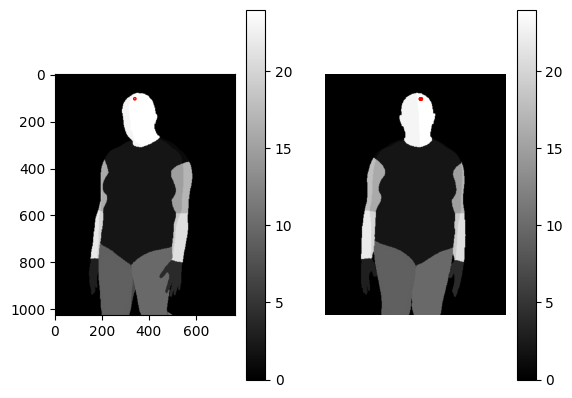

In [99]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
# dp_path0 = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00006_00.jpg.npy'
dp_path0 = '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose_fat/00069_00 copy 2.jpg.npy'
# dp_path1 = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00008_00.jpg.npy'
dp_path1 = '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose_fat/00069_00 copy 9.jpg.npy'

# dp_path = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my2/range/iuv_0.npy'
# dp_i_path0 = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose_i/00006_00.jpg.npy'
dp_i_path0 = '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose_i_fat/00069_00 copy 2.jpg.npy'
# dp_i_path1 = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose_i/00008_00.jpg.npy'
dp_i_path1 = '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose_i_fat/00069_00 copy 9.jpg.npy'
# from IPython import embed; embed()


# data1 = np.load(dp_path1)
# print(data1[0,780, 173])
# print(data1[0,780, 173].dtype)
# print(data1[0,780, 173].round(decimals=3))
# print(data1[0,780, 173].round().dtype)
# data1[1][data1[1] != 0] = 1 - data1[1][data1[1] != 0]
# print(data1.shape)
# np.save(dp_path0, data1)

# data10 = np.load(dp_path1)[ 0, :, :].round(decimals=3)
# data11 = np.load(dp_path1)[ 1, :, :].round(decimals=3)
data1_uv = np.load(dp_path1).round(decimals=2)
data1_i = np.load(dp_i_path1)

data1 = np.concatenate([data1_uv,data1_i],axis=0)
# print(data1.shape)
# 1 1024 

# data00 = np.load(dp_path0)[0, :, :].round(decimals=3)
# data01 = np.load(dp_path0)[1, :, :].round(decimals=3)
data0_uv = np.load(dp_path0).round(decimals=2)
data0_i = np.load(dp_i_path0)

data0 = np.concatenate([data0_uv,data0_i],axis=0)
print(data0_i.shape)

plt.subplot(1,2,1)
# 绘制图像
plt.imshow(data0_i[0], cmap='gray')
# 添加颜色条
plt.colorbar()

# 显示坐标为[94.0, 353.0]的点为红色圆圈
circle = plt.Circle((340.0, 103.0), radius=5, color='red', fill=False)
plt.gca().add_patch(circle)
# circle = plt.Circle((344.0,192.0), radius=5, color='blue', fill=False)
# plt.gca().add_patch(circle)
# circle = plt.Circle((402.0,195.0), radius=5, color='black', fill=False)
# plt.gca().add_patch(circle)
# 不显示坐标轴
plt.axis('on')

plt.subplot(1,2,2)
# 绘制图像
plt.imshow(data1_i[0], cmap='gray')
# 添加颜色条
plt.colorbar()

# 定义要显示的点的坐标
points = [[104,406], [104,404], [104,405],[104,407],[104,408]]

# 循环创建并显示圆圈
for point in points:
    circle = plt.Circle((point[1], point[0]), radius=5, color='red', fill=False)
    plt.gca().add_patch(circle)

# # 定义要显示的点的坐标
# points = [[191, 355], [191, 356], [192, 355],[192, 356]]

# # 循环创建并显示圆圈
# for point in points:
#     circle = plt.Circle((point[1], point[0]), radius=5, color='blue', fill=False)
#     plt.gca().add_patch(circle)
# # 定义要显示的点的坐标
# points = [[199, 412], [199, 411], [198, 411],[198, 412]]

# # 循环创建并显示圆圈
# for point in points:
#     circle = plt.Circle((point[1], point[0]), radius=5, color='black', fill=False)
#     plt.gca().add_patch(circle)
# 不显示坐标轴
plt.axis('off')
plt.show()

# plt.subplot(1,2,2)
# plt.axis('off')
# # 绘制图像
# plt.imshow(data10, cmap='gray')
# # 添加颜色条
# plt.colorbar()
# plt.show()

# print(data00.shape)
# plt.subplot(1,2,1)
# plt.axis('off')
# # 绘制图像
# plt.imshow(data00, cmap='gray')
# # 添加颜色条
# plt.colorbar()

# plt.subplot(1,2,2)
# plt.axis('off')
# # 绘制图像
# plt.imshow(data01,cmap='gray')
# # 添加颜色条
# plt.colorbar()
# plt.show()

# print(data10.shape)

# # 创建一个红色的颜色映射
# cmap = plt.get_cmap('gray')
# # 创建一个副本数组，将对应数据值为0.5的像素设为红色
# masked_data = np.ma.masked_inside(data10, 0.1, 0.2)
# cmap.set_bad(color='red', alpha=1.0)

# plt.subplot(1,2,1)
# plt.axis('off')
# # 绘制图像
# plt.imshow(masked_data, cmap=cmap)
# # 添加颜色条
# plt.colorbar()

# plt.subplot(1,2,2)
# plt.axis('off')
# # 绘制图像
# plt.imshow(data11,cmap='gray')
# # 添加颜色条
# plt.colorbar()
# plt.show()

In [75]:
import numpy as np

a = np.ones([1024, 768]).astype(np.float32)  # 生成形状为 (1024, 768) 的随机数组，元素类型为 float32
b = np.ones([1024, 768]).astype(np.float32)  # 生成形状为 (1024, 768) 的随机数组，元素类型为 float32

# 创建一个空列表，用于存储符合条件的坐标

c = np.empty_like(a, dtype=list)

for i in range(102):
    for j in range(76):
        item=np.where(b==a[i, j])
        c[i,j]=item


print(c)
# print(c[0,0])

[[(array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  (array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  (array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  ... None None None]
 [(array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  (array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  (array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  ... None None None]
 [(array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  (array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  (array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))
  ... None None None]
 ...
 [None None None ... None None None]
 [None None None ..

['/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_0.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_1.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_2.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_3.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_4.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_5.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_6.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_7.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_8.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_9.npy']
(2, 1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)


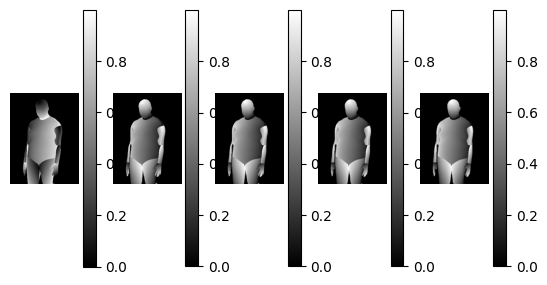

(1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)


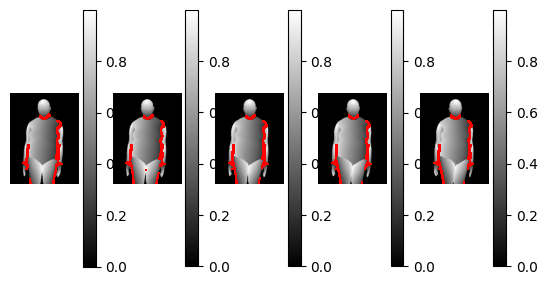

"\n# plt.subplot(1,2,2)\n# plt.axis('off')\n# # 绘制图像\n# plt.imshow(data01,cmap='gray')\n# # 添加颜色条\n# plt.colorbar()\n\npath_0 = file_paths[0]\ndata = np.load(path_0)\n# print(data.shape)\ndata00 = np.load(path_0)[0, :, :]\n\n# # 获取图像的尺寸\n# height, width = data00.shape\n# # 计算图像的正方形边长\n# side_length = max(height, width)\n# # 计算图像的显示范围\n# extent = [0, side_length, 0, side_length]\n\nplt.subplot(1,3,1)\nplt.axis('off')\nplt.imshow(data00,cmap='gray')\nplt.colorbar()\n\npath_1 = file_paths[5]\ndata01 = np.load(path_1)[0, :, :]\nplt.subplot(1,3,2)\nplt.axis('off')\nplt.imshow(data01,cmap='gray')\nplt.colorbar()\n\ndata00 = torch.tensor(data00).unsqueeze(dim=0)\nprint(data00.shape)\ndata01 = torch.tensor(data01).unsqueeze(dim=0)\n\nbaddbmm_input = torch.empty(\n               data00.shape[0], data00.shape[1], data01.shape[1], dtype=data00.dtype, device=data00.device\n            )\nprint(baddbmm_input.shape)\nattention_scores = torch.baddbmm(\n            baddbmm_input,\n            data00,\

In [84]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt


folder_path = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4'
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.npy')]
file_paths.sort()
print(file_paths)
print(np.load(file_paths[0]).shape)

# from IPython import embed; embed()
for i in range(5):
    path_i = file_paths[i]
    data0 = np.load(path_i)[0, :, :]
    data1 = np.load(path_i)[1, :, :]

    print(data1.shape)
    plt.subplot(1,5,i+1)
    plt.axis('off')
    # 绘制图像
    plt.imshow(data1, cmap='gray')
    # 添加颜色条
    plt.colorbar()
plt.show()
for i in range(5,10):
    path_i = file_paths[i]
    data0 = np.load(path_i)[0, :, :]
    data1 = np.load(path_i)[1, :, :]
    
    print(data1.shape)
    # 创建一个红色的颜色映射
    cmap = plt.get_cmap('gray')
    # 创建一个副本数组，将对应数据值为0.5的像素设为红色
    masked_data = np.ma.masked_inside(data1, 0.1, 0.2)
    cmap.set_bad(color='red', alpha=1.0)

    plt.subplot(1,5,i-4)
    plt.axis('off')
    # 绘制图像
    plt.imshow(masked_data, cmap=cmap)
    # 添加颜色条
    plt.colorbar()
plt.show()
'''
# plt.subplot(1,2,2)
# plt.axis('off')
# # 绘制图像
# plt.imshow(data01,cmap='gray')
# # 添加颜色条
# plt.colorbar()

path_0 = file_paths[0]
data = np.load(path_0)
# print(data.shape)
data00 = np.load(path_0)[0, :, :]

# # 获取图像的尺寸
# height, width = data00.shape
# # 计算图像的正方形边长
# side_length = max(height, width)
# # 计算图像的显示范围
# extent = [0, side_length, 0, side_length]

plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(data00,cmap='gray')
plt.colorbar()

path_1 = file_paths[5]
data01 = np.load(path_1)[0, :, :]
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(data01,cmap='gray')
plt.colorbar()

data00 = torch.tensor(data00).unsqueeze(dim=0)
print(data00.shape)
data01 = torch.tensor(data01).unsqueeze(dim=0)

baddbmm_input = torch.empty(
               data00.shape[0], data00.shape[1], data01.shape[1], dtype=data00.dtype, device=data00.device
            )
print(baddbmm_input.shape)
attention_scores = torch.baddbmm(
            baddbmm_input,
            data00,
            data01.transpose(-1, -2),
            beta=0,
            alpha=0.2,
        )
attention_probs = attention_scores.softmax(dim=-1)
print(attention_probs.shape)
attention_probs =np.array(attention_probs[0])
# data01 = np.swapaxes(data01, -1, -2)
# res = np.matmul(data00,data01)*0.5
# res = torch.tensor(res).softmax(dim=-1)
# print(res.shape)
plt.subplot(1,3,3)
plt.axis('off')
# 绘制图像
plt.imshow(attention_probs, cmap='gray')
# 添加颜色条
plt.colorbar()
'''

['/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_0.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_1.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_2.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_3.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_4.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_5.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_6.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_7.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_8.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_9.npy']
(2, 1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)


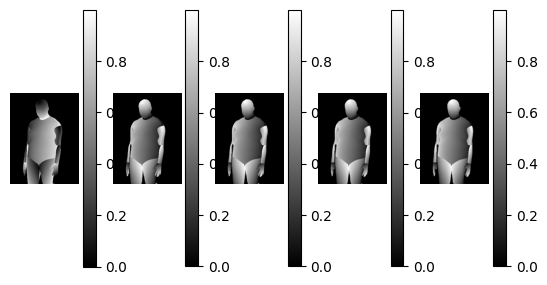

(1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)


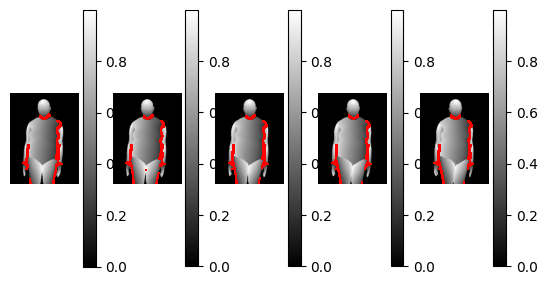

In [4]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt


folder_path = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4'
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.npy')]
file_paths.sort()
print(file_paths)
print(np.load(file_paths[0]).shape)

# from IPython import embed; embed()
for i in range(5):
    path_i = file_paths[i]
    data0 = np.load(path_i)[0, :, :]
    data1 = np.load(path_i)[1, :, :]

    print(data1.shape)
    plt.subplot(1,5,i+1)
    plt.axis('off')
    # 绘制图像
    plt.imshow(data1, cmap='gray')
    # 添加颜色条
    plt.colorbar()
plt.show()
for i in range(5,10):
    path_i = file_paths[i]
    data0 = np.load(path_i)[0, :, :]
    data1 = np.load(path_i)[1, :, :]
    
    print(data1.shape)
    # 创建一个红色的颜色映射
    cmap = plt.get_cmap('gray')
    # 创建一个副本数组，将对应数据值为0.5的像素设为红色
    masked_data = np.ma.masked_inside(data1, 0.1, 0.2)
    cmap.set_bad(color='red', alpha=1.0)

    plt.subplot(1,5,i-4)
    plt.axis('off')
    # 绘制图像
    plt.imshow(masked_data, cmap=cmap)
    # 添加颜色条
    plt.colorbar()
plt.show()

torch.Size([1024, 768])
torch.Size([1024, 1024])


/tmp/ipykernel_50199/395366493.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  res = torch.tensor(res).softmax(dim=-1)


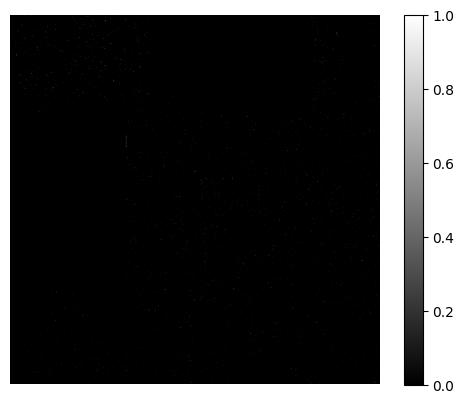

In [58]:
from PIL import Image
import numpy as np
from einops import rearrange

# 加载图片
image1 = Image.open('/HOME/HOME/jisihui/VITON-hd-resized/train/image-densepose/00000_00.jpg')
image2 = Image.open('/HOME/HOME/jisihui/VITON-hd-resized/train/image-densepose/00003_00.jpg')

# 将图片转换为 NumPy 数组
data00 = torch.tensor(np.array(image1)[:,:,1])
data01 = torch.tensor(np.array(image2)[:,:,1])
print(data00.shape)

# baddbmm_input = torch.empty(
#                data00.shape[0], data00.shape[1], data01.shape[1], dtype=data00.dtype, device=data00.device
#             )
# print(baddbmm_input.shape)
# attention_scores = torch.baddbmm(
#             baddbmm_input,
#             data00,
#             data01.transpose(-1, -2),
#             beta=0,
#             alpha=0.2,
#         )
# attention_probs = attention_scores.softmax(dim=-1)
# print(attention_probs.shape)
# attention_probs =np.array(attention_probs[0])
data01 = np.swapaxes(data01, -1, -2)
res = np.matmul(data00,data01)*10.0
res = torch.tensor(res).softmax(dim=-1)
print(res.shape)
plt.axis('off')
# 绘制图像
plt.imshow(res, cmap='gray')
# 添加颜色条
plt.colorbar()


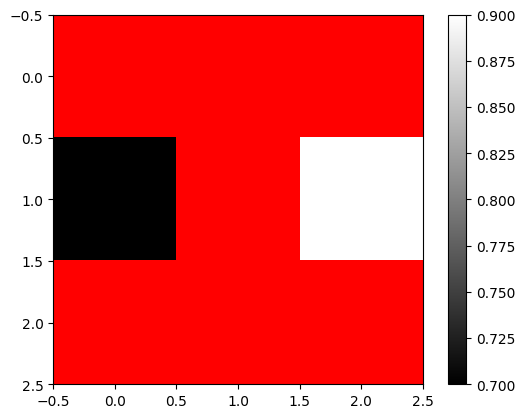

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 假设data是一个二维数组，表示图像数据
data = np.array([[0.1, 0.5, 0.3],
                 [0.7, 0.5, 0.9],
                 [0.4, 0.2, 0.5]])

# 创建一个红色的颜色映射
cmap = plt.get_cmap('gray')

# 创建一个副本数组，将对应数据值在0.1到0.5之间的像素设为红色
masked_data = np.ma.masked_inside(data, 0.1, 0.5)
cmap.set_bad(color='red', alpha=1.0)

# 绘制图像
plt.imshow(masked_data, cmap=cmap)
plt.colorbar()
plt.show()

In [2]:
import torch

# 假设 a 是包含三个维度为 [1, 4, 32, 32] 的张量的列表
a = [torch.rand([1, 64, 32,2]) for _ in range(10)]
# merged = torch.cat(a, dim=1)
# torch.Size([1, 640, 32, 2])
merged = torch.stack(a,dim=1)
# torch.Size([1, 10, 64, 32, 2])
print(merged.shape)

# densepose = torch.randn([10, 2, 1024, 768]).unsqueeze(0)
# a=torch.cat([torch.zeros(densepose.shape), densepose])
# a.shape

torch.Size([1, 640, 32, 2])


In [1]:
import numpy as np

array = np.random.rand(4, 32, 32)

expanded_array = np.expand_dims(array, axis=0)

print(expanded_array.shape)

(1, 4, 32, 32)


In [8]:
import torch
a = torch.rand([160,32,40])
b = torch.rand([160,32,40]).transpose(-1,-2)
c=a@b
c.shape
# torch.Size([160, 32, 32])
# b.shape



torch.Size([160, 32, 32])

In [ ]:

# 创建一个形状为 (2, 3) 的未初始化张量
x = torch.empty(2, 3)
print(x)

# 创建一个形状为 (3, 4, 5) 的未初始化张量，指定数据类型为 float32
y = torch.empty(3, 4, 5, dtype=torch.float32)
print(y)
# def dl2ld(dl):
#     return [dict(zip(dl, e)) for e in zip(*dl.values())]
# d={'a':[1,2],'b':[3,4]}
# l = dl2ld(d)
# print(l)
# for _, sample in enumerate(l):
#     print(sample)


In [3]:
import os
dp_file = '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose'
dp_name_list = os.listdir(dp_file)
dp_paths = [ dp_file + '/' + dp_name for dp_name in dp_name_list]
dp_paths.sort()
dp_paths

['/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose/00069_00 copy 2.jpg.npy',
 '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose/00069_00 copy 3.jpg.npy',
 '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose/00069_00 copy 4.jpg.npy',
 '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose/00069_00 copy 5.jpg.npy',
 '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose/00069_00 copy 6.jpg.npy',
 '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose/00069_00 copy 7.jpg.npy',
 '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose/00069_00 copy 8.jpg.npy',
 '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose/00069_00 copy 9.jpg.npy',
 '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose/00069_00 copy.jpg.npy',
 '/HOME/HOME/jisihui/VITON-hd-resized/try2.0/densepose/00069_00.jpg.npy']

In [28]:
# print(len(p2))
# print(len(p1))
# print('---')
dp_path0 = '/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat/00069_00 copy 2.jpg.npy'
data0_uv_base=np.load(dp_path0)
data0_uv = data0_uv_base.round(decimals=2)
# print(np.sum(data0_uv[0]!=0))
print(np.sum(data0_uv_base[0]!=0))

cc = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor/00069_00 copy 2.jpg.npy',allow_pickle=True)
print(np.sum(cc[:,:,0]!=-1))


cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new2.0/00069_00 copy 2.jpg.npy',allow_pickle=True)
print(np.sum(cc1[:,:,0]!=-100000))



290564
290406
290564


(1, 1024, 768)


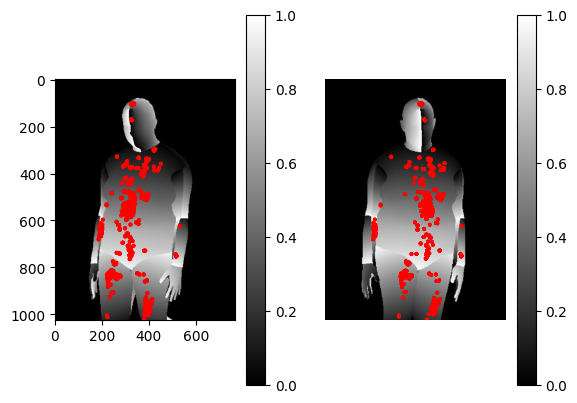

In [2]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
# dp_path0 = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00006_00.jpg.npy'
dp_path0 = '/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat/00069_00 copy 2.jpg.npy'
# dp_path1 = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00008_00.jpg.npy'
dp_path1 = '/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat/00069_00 copy.jpg.npy'

# dp_path = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my2/range/iuv_0.npy'
# dp_i_path0 = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose_i/00006_00.jpg.npy'
dp_i_path0 = '/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_i_fat/00069_00 copy 2.jpg.npy'
# dp_i_path1 = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose_i/00008_00.jpg.npy'
dp_i_path1 = '/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_i_fat/00069_00 copy.jpg.npy'


data1_uv = np.load(dp_path1).round(decimals=2)
data1_i = np.load(dp_i_path1)

data1 = np.concatenate([data1_uv,data1_i],axis=0)

data0_uv = np.load(dp_path0).round(decimals=2)
data0_i = np.load(dp_i_path0)

data0 = np.concatenate([data0_uv,data0_i],axis=0)
print(data0_i.shape)

plt.subplot(1,2,1)
# 绘制图像
plt.imshow(data0_uv[0], cmap='gray')
# 添加颜色条
plt.colorbar()

# 显示坐标为[94.0, 353.0]的点为红色圆圈
# circle = plt.Circle((420.0, 148.0), radius=5, color='red', fill=False)
# plt.gca().add_patch(circle)


cc = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new/00069_00 copy.jpg.npy',allow_pickle=True)
p1=[]
p2=[]
for i in range(1024):
    for j in range(768):
            if cc[i,j,0]!=-100000:
                # print(c[i,j])
                p1.append((j,i))
                p2.append((cc[i,j,1],cc[i,j,0]))
                # print((cc[i,j,0],cc[i,j,1]),(i,j))


# 循环创建并显示圆圈
for i in range(len(p1)):
    circle = plt.Circle(p1[i], radius=5, color='red', fill=False)
    plt.gca().add_patch(circle)

plt.subplot(1,2,2)
# 绘制图像
plt.imshow(data1_uv[0], cmap='gray')
# 添加颜色条
plt.colorbar()

# 循环创建并显示圆圈
for i in range(len(p1)):
    circle = plt.Circle(p2[i], radius=5, color='red', fill=False)
    plt.gca().add_patch(circle)
# circle = plt.Circle([100,200], radius=5, color='red', fill=False)
# plt.gca().add_patch(circle)
# 不显示坐标轴
plt.axis('off')
plt.show()

In [1]:
import numpy as np
cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new2.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
mask = (cc1[..., 0] >= 0)*(cc1[..., 0] < 1024) * (cc1[..., 1] >= 0)*(cc1[..., 1] < 768)
print(mask.shape)
print(np.sum(mask!=0)/mask.size)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new3.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new4.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new5.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

print('---')
cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new6.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new7.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new8.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new9.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new10.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new11.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new12.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new13.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new14.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new15.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)
print('new!')
cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new16.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new17.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new18.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

cc1 = np.load('/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat_cor_new19.0/00069_00 copy 3.jpg.npy',allow_pickle=True)
print(np.sum(cc1!=-100000)/cc1.size)

print('---')
dp_path0 = '/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_fat/00069_00 copy 3.jpg.npy'
i_path0 = '/home/nfs/jsh/HOME/VITON-hd-resized/try2.0/densepose_i_fat/00069_00 copy 3.jpg.npy'
data0_uv_base=np.load(dp_path0)
data0_i_base = np.load(i_path0)
print(np.sum(data0_uv_base!=0)/data0_uv_base.size)
print(np.sum(data0_i_base!=0)/data0_i_base.size)


(1024, 768)
0.057428995768229164
0.057428995768229164
0.031733194986979164
0.14687601725260416
0.10333251953125
0.14687601725260416
---
0.3689715067545573
0.36139551798502606
0.36825307210286456
0.36945851643880206
0.3693733215332031
0.46719106038411456
0.36872100830078125
0.36139551798502606
0.3692919413248698
0.3692029317220052
new!
0.17446136474609375
0.24857203165690103
0.306854248046875
0.3027788798014323
---
0.3760223388671875
0.3760223388671875
